# launch ichthyop simulations

In [1]:
import numpy as np
import pandas as pd

import taos.mars as ms
import taos.drifters as dr

work_dir = "/home/datawork-lops-osi/aponte/taos/ichthy"

--- 

## overview of the area

{'fig': <Figure size 1440x720 with 2 Axes>,
 'ax': <GeoAxesSubplot:title={'center':'water depth [m]'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x2aaaea569f40>}

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0

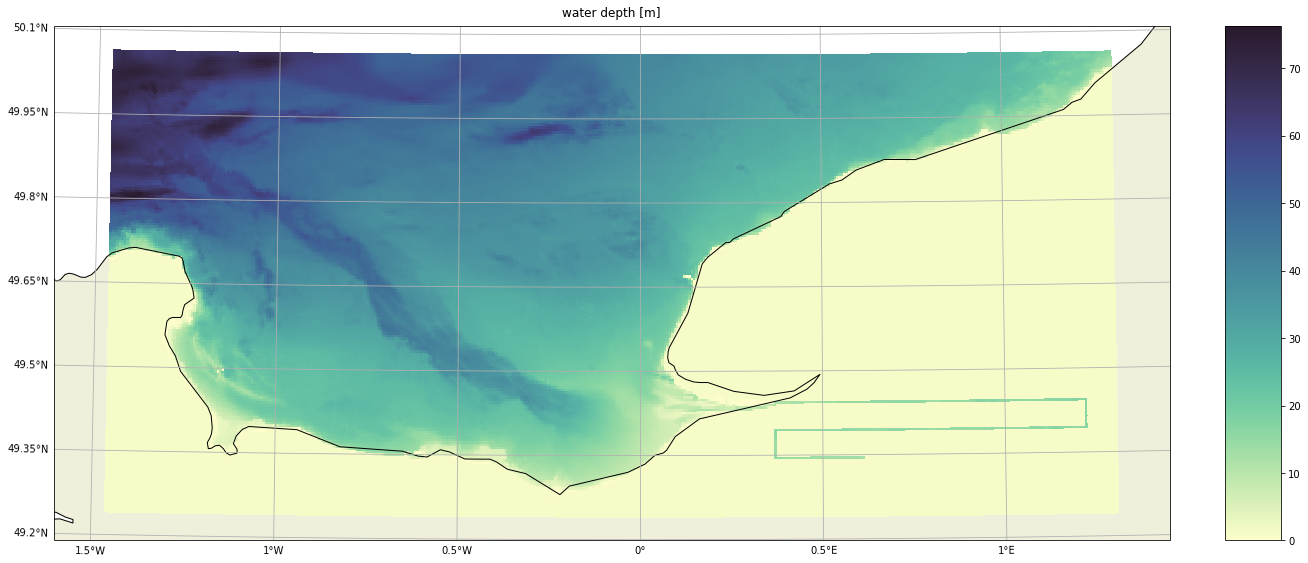

In [2]:
ds = ms.load_date("2011-01-01 00:00:00")

ms.plot_bs(-ds["z"].isel(time=0, level=0), 
           title="water depth [m]",
           vmin=0,
           cmap=ms.cm.deep,
           zoom=0, figsize=1,
          )

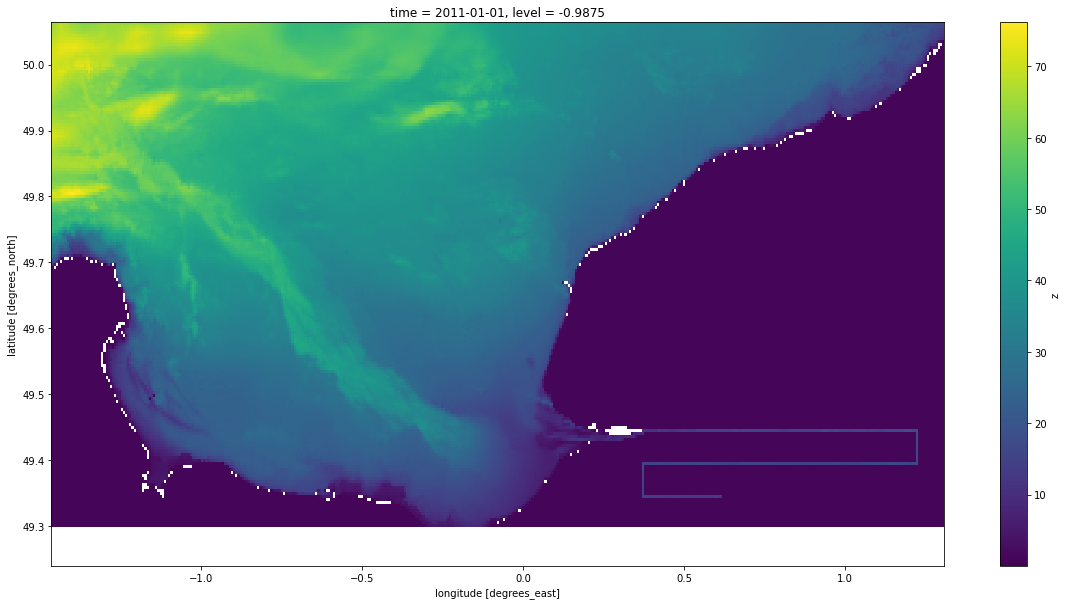

In [3]:
h = -ds["z"].isel(time=0, level=0)
h = h.where( (h>0) & (h.latitude>49.3)  )
h.plot(x="longitude", y="latitude", figsize=(20,10))

---

## simple case: 1 run

In [4]:
cfg = dict(initial_time="year 2011 month 01 day 01 at 01:00",
           transport_duration="005 day(s) 00 hour(s) 00 minute(s)",
           number_particles=500,
           lon_stain=-0.25,
           lat_stain=49.4,
           depth_stain=-0.0,
           radius_stain=1000,
           thickness_stain=1.0,
          )

In [5]:
dr.ichthy("test0", workdir=work_dir, **cfg)

Run will be stored in /home/datawork-lops-osi/aponte/taos/ichthy/test0
File cfg.xml has been generated
7788142.datarmor0


---

# launch runs at different time periods

In [6]:
files = ms.browse_files()
print("Number of data files = {} ".format(len(files)))

print("First available date: {}".format(files.index.min()))
print("Last available date: {}".format(files.index.max()))

Number of data files = 79103 
First available date: 2010-01-01 01:00:00+00:00
Last available date: 2019-01-01 00:00:00+00:00


## single location

In [5]:
cfg = dict(initial_time="year 2011 month 01 day 01 at 01:00",
           transport_duration="0025 day(s) 00 hour(s) 00 minute(s)",
           number_particles=500,
           lon_stain=-0.25,
           lat_stain=49.4,
           depth_stain=-0.0,
           radius_stain=1000,
           thickness_stain=1.0,
          )

In [ ]:
t_range = pd.date_range(start="2011/02/01", end="2018/12/01", freq='MS')    

for t, i in zip(t_range, range(t_range.size)):
    print(t, i)
    cfg["initial_time"] = dr.format_date(t)
    dr.ichthy(t.strftime("t_%Y%m"),
              jobname="ic{:03d}".format(i),
              workdir=work_dir,
              **cfg,
             )

## multiple locations

In [8]:
cfg = dict(initial_time="year 2011 month 01 day 01 at 01:00",
           transport_duration="0025 day(s) 00 hour(s) 00 minute(s)",
           number_particles=500,
           lon_stain=-0.25,
           #lat_stain=49.4,
           depth_stain=-0.0,
           radius_stain=1000,
           thickness_stain=1.0,
          )

In [9]:
lats = np.arange(49.3, 49.7, .02)
t_range = pd.date_range(start="2011/02/01", end="2012/02/01", freq="2D")

for t, i in zip(t_range, range(t_range.size)):

    key = str(t).split()[0]
    
    configurations = {}
    for lat in lats:
        #print(t, i)
        _cfg = dict(**cfg)
        _cfg["lat_stain"] = lat
        _cfg["initial_time"] = dr.format_date(t)
        configurations["lat{:.2f}".format(lat)] = _cfg

    dr.ichthys(key+"_",
       configurations,
       jobname="icl{:03d}".format(i),
       workdir=work_dir,
       launch=True,
      )

7788377.datarmor0
7788378.datarmor0
7788379.datarmor0
7788380.datarmor0
7788381.datarmor0
7788382.datarmor0
7788383.datarmor0
7788384.datarmor0
7788385.datarmor0
7788386.datarmor0
7788387.datarmor0
7788388.datarmor0
7788389.datarmor0
7788390.datarmor0
7788391.datarmor0
7788392.datarmor0
7788394.datarmor0
7788395.datarmor0
7788396.datarmor0
7788397.datarmor0
7788398.datarmor0
7788399.datarmor0
7788400.datarmor0
7788401.datarmor0
7788402.datarmor0
7788403.datarmor0
7788404.datarmor0
7788405.datarmor0
7788406.datarmor0
7788407.datarmor0
7788408.datarmor0
7788409.datarmor0
7788410.datarmor0
7788411.datarmor0
7788412.datarmor0
7788413.datarmor0
7788415.datarmor0
7788416.datarmor0
7788417.datarmor0
7788418.datarmor0
7788419.datarmor0
7788420.datarmor0
7788421.datarmor0
7788423.datarmor0
7788424.datarmor0
7788426.datarmor0
7788427.datarmor0
7788428.datarmor0
7788429.datarmor0
7788430.datarmor0
7788432.datarmor0
7788433.datarmor0
7788434.datarmor0
7788435.datarmor0
7788436.datarmor0
7788437.da

---
### may need to go back to the right start dir if hick ups

In [11]:
%pwd

'/home1/datahome/aponte/taos/drifters'

In [10]:
cd /home1/datahome/aponte/taos/drifters

/home1/datahome/aponte/taos/drifters
